In [2]:
import requests as req
import json
import pandas as pd
import numpy as np
import datetime
import os
from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
files = os.listdir('historical_data_pre_may')
for file in files:
    if file[0:3]=='BTC':
        btc_df = pd.read_csv('historical_data_pre_may/%s'%file)
        print('BTC dataframe generated')
    elif file[0:3]=='ETH':
        eth_df = pd.read_csv('historical_data_pre_may/%s'%file)
        print('ETH dataframe generated')
    elif file[0:3]=='LTC':
        ltc_df =  pd.read_csv('historical_data_pre_may/%s'%file)
        print('LTC dataframe generated')
btc_df.head()

BTC dataframe generated
ETH dataframe generated
LTC dataframe generated


,Date,High,Low,Open,Close
0,2013-02-19,31.30,28.99,29.42,30.25
1,2013-02-22,30.69,28.00,30.25,30.40
2,2013-02-25,34.52,30.12,30.40,33.38
3,2013-02-28,34.90,32.92,33.38,34.50
4,2013-03-03,49.10,34.19,34.50,41.02


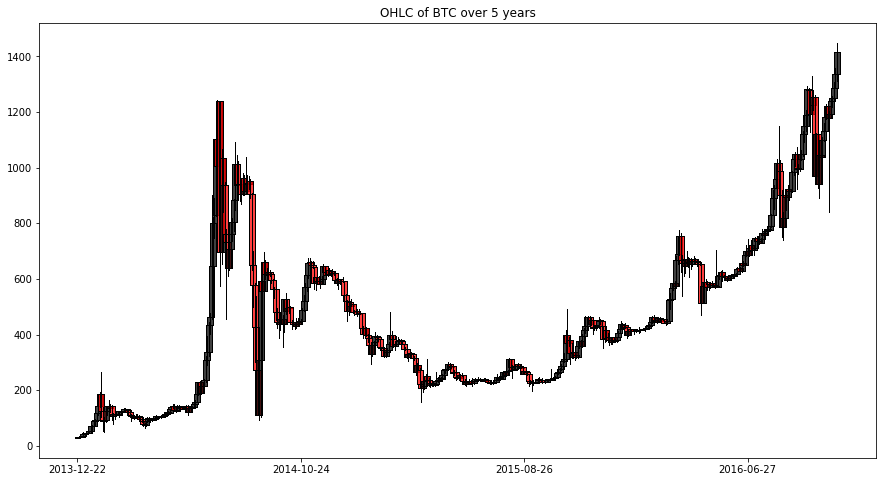

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,btc_df['Open'],btc_df['High'],btc_df['Low'],btc_df['Close'])
plt.title('OHLC of BTC over 5 years')

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()


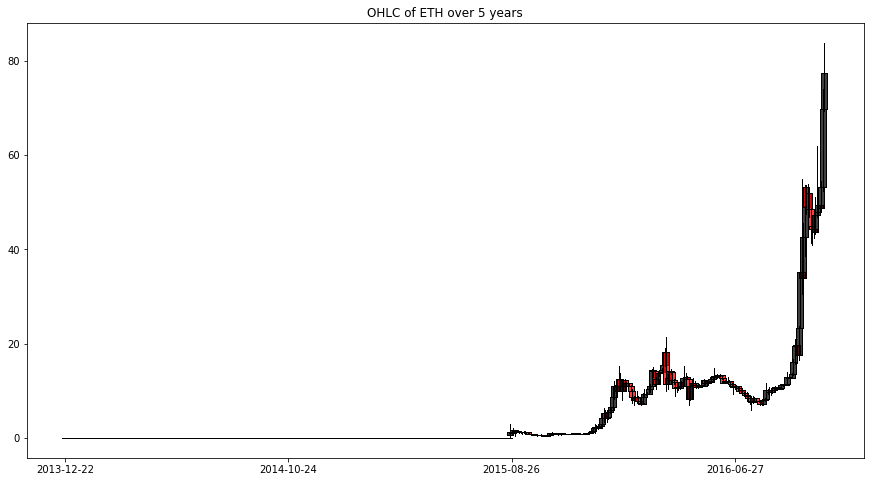

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,eth_df['Open'],eth_df['High'],eth_df['Low'],eth_df['Close'])
plt.title('OHLC of ETH over 5 years')

num_ticks = 5

inv_ticks = int(len(eth_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()


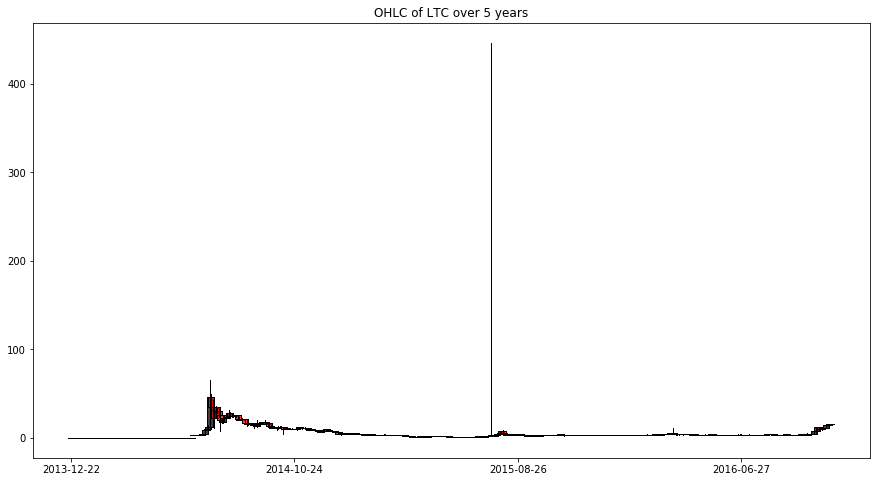

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(w=15,h=8,forward=True)
candlestick2_ohlc(ax,ltc_df['Open'],ltc_df['High'],ltc_df['Low'],ltc_df['Close'])
plt.title('OHLC of LTC over 5 years')

num_ticks = 5

inv_ticks = int(len(ltc_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

# Open flucation analysis (velocity)

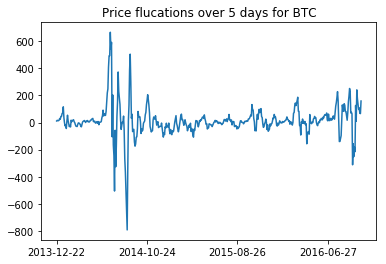

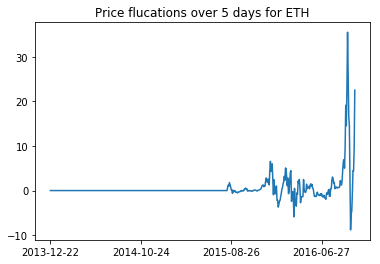

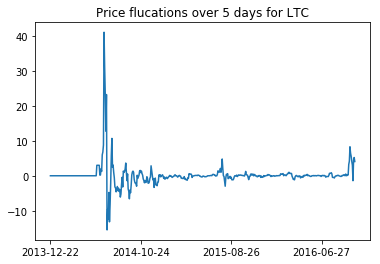

In [7]:
btc_differences = list()
eth_differences = list()
ltc_differences = list()

step = 5

for i in range(len(btc_df['Open'])-step):
    btc_differences.append(btc_df['Open'][i+step]-btc_df['Open'][i])
    eth_differences.append(eth_df['Open'][i+step]-eth_df['Open'][i])
    ltc_differences.append(ltc_df['Open'][i+step]-ltc_df['Open'][i])


num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
plt.title('Price flucations over %s days for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
plt.title('Price flucations over %s days for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
plt.title('Price flucations over %s days for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [8]:
top20 = int(len(btc_differences)/5)
top_index_btc = sorted(range(len(btc_differences)), key=lambda i: btc_differences[i])[-top20:]
top_btc = [btc_differences[i] for i in top_index_btc]
top_btc[0:5]

[50.639999999999986,
 50.800000000000011,
 51.669999999999959,
 52.060000000000002,
 54.0]

# Open flucation analysis (acceleration)

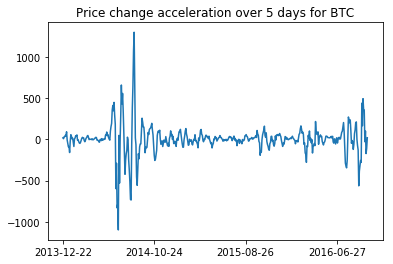

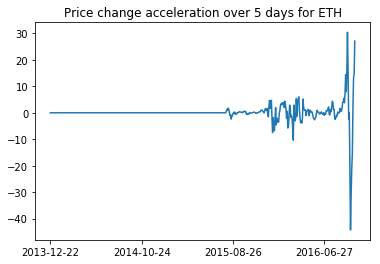

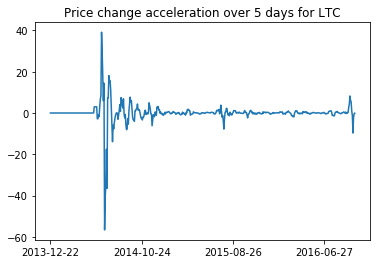

In [9]:
btc_accel = list()
eth_accel = list()
ltc_accel = list()

step = 5

for i in range(len(btc_differences)-step):
    btc_accel.append(btc_differences[i+step]-btc_differences[i])
    eth_accel.append(eth_differences[i+step]-eth_differences[i])
    ltc_accel.append(ltc_differences[i+step]-ltc_differences[i])

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
    
fig, ax = plt.subplots()
plt.plot(btc_accel)
plt.title('Price change acceleration over %s days for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_accel)
plt.title('Price change acceleration over %s days for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_accel)
plt.title('Price change acceleration over %s days for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [10]:
# find sign changes in acceleration analysis
signs = np.sign(btc_accel)
sign_changes_btc = ((np.roll(signs, 1) - signs) != 0).astype(int)
unique, counts = np.unique(sign_changes_btc,return_counts=True)
print(np.asarray((unique, counts)).T)

signs = np.sign(eth_accel)
sign_changes_eth = ((np.roll(signs, 1) - signs) != 0).astype(int)
unique, counts = np.unique(sign_changes_eth,return_counts=True)
print(np.asarray((unique, counts)).T)

signs = np.sign(ltc_accel)
sign_changes_ltc = ((np.roll(signs, 1) - signs) != 0).astype(int)
unique, counts = np.unique(sign_changes_ltc,return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 381]
 [  1 120]]
[[  0 447]
 [  1  54]]
[[  0 394]
 [  1 107]]


# Velocity combined with Acceleration Analysis

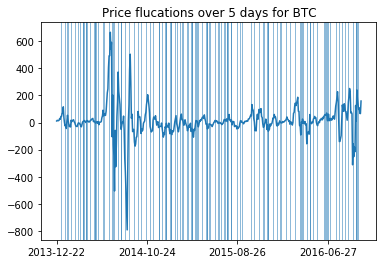

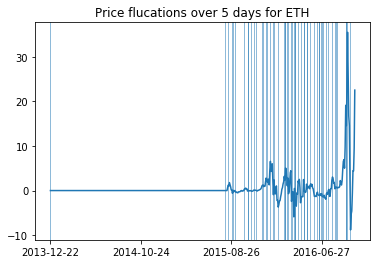

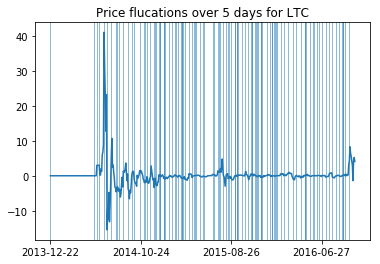

In [11]:
sign_changes_btc_normalized = np.append(sign_changes_btc,[0,0,0,0,0])
sign_changes_eth_normalized = np.append(sign_changes_eth,[0,0,0,0,0])
sign_changes_ltc_normalized = np.append(sign_changes_ltc,[0,0,0,0,0])

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
xlist = [i for i in range(len(sign_changes_btc_normalized))]
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
for x in xlist:
    if sign_changes_btc_normalized[x]==1:
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s days for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
for x in xlist:
    if sign_changes_eth_normalized[x]==1:
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s days for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
for x in xlist:
    if sign_changes_ltc_normalized[x]==1:
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s days for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

# The above replots the velocity analysis and highlights the detected events with vertical lines

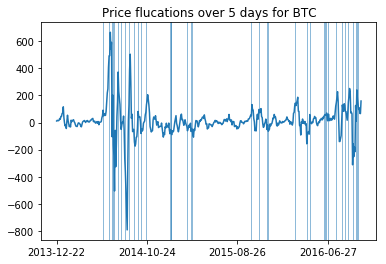

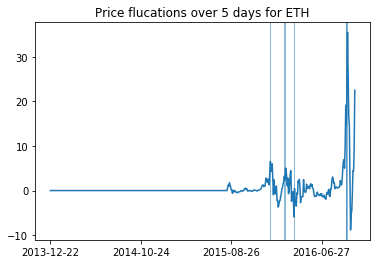

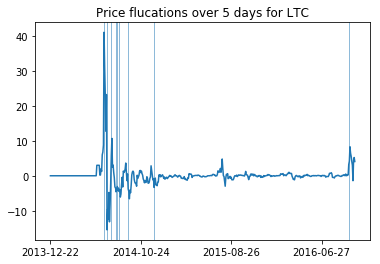

In [13]:
# Setting minimum limits for significant event
btc_lim = 50
eth_lim = 3
ltc_lim = 3
 

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
xlist = [i for i in range(len(sign_changes_btc_normalized))]
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
for x in xlist:
    if sign_changes_btc_normalized[x]==1 and (btc_differences[x]>btc_lim or btc_differences[x]<-btc_lim):
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s days for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
for x in xlist:
    if sign_changes_eth_normalized[x]==1 and (eth_differences[x]>eth_lim or eth_differences[x]<-eth_lim):
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s days for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
for x in xlist:
    if sign_changes_ltc_normalized[x]==1 and (ltc_differences[x]>ltc_lim or ltc_differences[x]<-ltc_lim):
        plt.axvline(x=x,linewidth=0.5)
plt.title('Price flucations over %s days for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

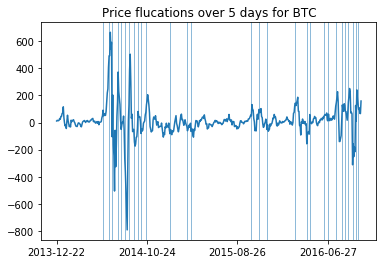

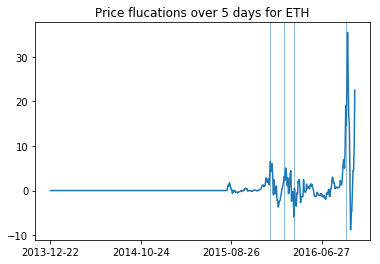

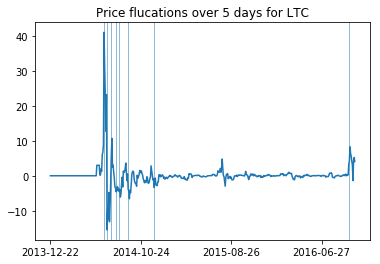

In [14]:
# Setting additional limits to cut down on noise by only looking at changes after a period of relative stability

btc_lim = 50
eth_lim = 3
ltc_lim = 3
recent_change_lim=3

recent_change_count=0

btc_event_index_list = list()
eth_event_index_list = list()
ltc_event_index_list = list()


num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
xlist = [i for i in range(len(sign_changes_btc_normalized))]
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
for x in xlist:
    if recent_change_count >= recent_change_lim:
        if sign_changes_btc_normalized[x]==1 and (btc_differences[x]>btc_lim or btc_differences[x]<-btc_lim):
            plt.axvline(x=x,linewidth=0.5)
            recent_change_count=0
            btc_event_index_list.append(x)
        else:
            recent_change_count += 1
    else:
        recent_change_count += 1
plt.title('Price flucations over %s days for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
for x in xlist:
    if recent_change_count >= recent_change_lim:
        if sign_changes_eth_normalized[x]==1 and (eth_differences[x]>eth_lim or eth_differences[x]<-eth_lim):
            plt.axvline(x=x,linewidth=0.5)
            recent_change_count=0
            eth_event_index_list.append(x)
        else:
            recent_change_count += 1
    else:
        recent_change_count += 1
plt.title('Price flucations over %s days for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
for x in xlist:
    if recent_change_count >= recent_change_lim:
        if sign_changes_ltc_normalized[x]==1 and (ltc_differences[x]>ltc_lim or ltc_differences[x]<-ltc_lim):
            plt.axvline(x=x,linewidth=0.5)
            recent_change_count=0
            ltc_event_index_list.append(x)
        else:
            recent_change_count += 1
    else:
        recent_change_count += 1
plt.title('Price flucations over %s days for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [15]:
values, counts = np.unique((btc_event_index_list-np.roll(btc_event_index_list,1)),return_counts=True)
print(np.asarray((values, counts)).T)
values, counts = np.unique((eth_event_index_list-np.roll(eth_event_index_list,1)),return_counts=True)
print(np.asarray((values, counts)).T)
values, counts = np.unique((ltc_event_index_list-np.roll(ltc_event_index_list,1)),return_counts=True)
print(np.asarray((values, counts)).T)

[[-423    1]
 [   4    2]
 [   5    5]
 [   6    4]
 [   7    2]
 [   8    1]
 [   9    3]
 [  10    1]
 [  11    1]
 [  12    1]
 [  13    1]
 [  14    1]
 [  19    1]
 [  24    1]
 [  29    1]
 [  39    1]
 [  47    1]
 [  99    1]]
[[-126    1]
 [  16    1]
 [  24    1]
 [  86    1]]
[[-407    1]
 [   4    1]
 [   5    1]
 [   7    1]
 [   8    1]
 [  16    1]
 [  43    1]
 [ 324    1]]


In [16]:
# The list of indices for significant events doesn't map perfectly to the original data frame, because the data was repeatedly
# aggregated over durations of *step* days.  The indices map to a frame that is 4 items less than the original data frame, so 
# I have added 2 to all elements in order to find the average date of each event
btc_event_index_list_normalized = [x+2 for x in btc_event_index_list]
eth_event_index_list_normalized = [x+2 for x in eth_event_index_list]
ltc_event_index_list_normalized = [x+2 for x in ltc_event_index_list]

In [17]:
btc_event_list = list()
eth_event_list = list()
ltc_event_list = list()

for i in btc_event_index_list_normalized:
    btc_event_list.append(btc_df['Date'][i])
for i in eth_event_index_list_normalized:
    eth_event_list.append(btc_df['Date'][i])
for i in ltc_event_index_list_normalized:
    ltc_event_list.append(btc_df['Date'][i])

In [18]:
btc_event_list

['2013-10-14',
 '2013-11-13',
 '2013-11-28',
 '2013-12-25',
 '2014-01-12',
 '2014-02-02',
 '2014-02-20',
 '2014-03-19',
 '2014-04-06',
 '2014-04-21',
 '2014-05-18',
 '2014-09-12',
 '2014-12-08',
 '2014-12-26',
 '2015-10-19',
 '2015-11-27',
 '2016-01-08',
 '2016-05-28',
 '2016-07-24',
 '2016-08-08',
 '2016-10-19',
 '2016-11-09',
 '2016-12-15',
 '2017-01-17',
 '2017-02-01',
 '2017-02-13',
 '2017-03-09',
 '2017-03-24',
 '2017-04-05']

In [19]:
eth_event_list

['2016-02-22', '2016-05-04', '2016-06-21', '2017-03-06']

In [20]:
ltc_event_list

['2013-11-19',
 '2013-12-04',
 '2013-12-25',
 '2014-01-18',
 '2014-01-30',
 '2014-03-19',
 '2014-07-26',
 '2017-03-24']

# Plotting significant dates across all tracked cyrpto currencies

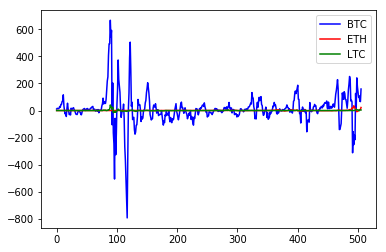

In [21]:
plt.plot(btc_differences,'b')
plt.plot(eth_differences,'r')
plt.plot(ltc_differences,'g')
plt.legend(['BTC','ETH','LTC'])
plt.show()

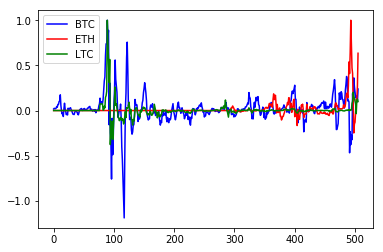

In [22]:
# Normalizing Axes
btc_differences_normalized = [x/max(btc_differences) for x in btc_differences]
eth_differences_normalized = [x/max(eth_differences) for x in eth_differences]
ltc_differences_normalized = [x/max(ltc_differences) for x in ltc_differences]

plt.plot(btc_differences_normalized,'b')
plt.plot(eth_differences_normalized,'r')
plt.plot(ltc_differences_normalized,'g')
plt.legend(['BTC','ETH','LTC'])
plt.show()

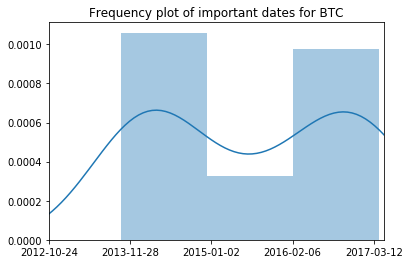

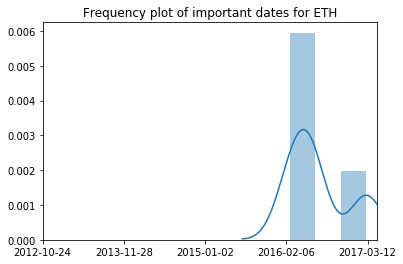

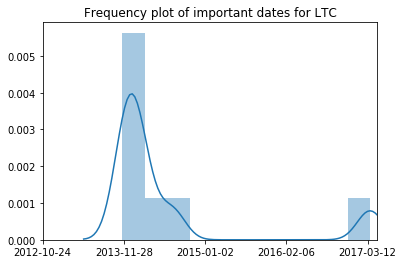

In [23]:
datetime_list_btc = [datetime.datetime.strptime(x,'%Y-%m-%d') for x in btc_event_list]
ordinal_list_btc = [x.toordinal() for x in datetime_list_btc]
datetime_list_eth = [datetime.datetime.strptime(x,'%Y-%m-%d') for x in eth_event_list]
ordinal_list_eth = [x.toordinal() for x in datetime_list_eth]
datetime_list_ltc = [datetime.datetime.strptime(x,'%Y-%m-%d') for x in ltc_event_list]
ordinal_list_ltc = [x.toordinal() for x in datetime_list_ltc]

ax = sns.distplot(ordinal_list_btc)
ax.set_xlim(left=datetime.datetime.strptime(btc_df['Date'][0], '%Y-%m-%d').toordinal(),right=datetime.datetime.strptime(btc_df['Date'].iloc[-1], '%Y-%m-%d').toordinal())
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
plt.title('Frequency plot of important dates for BTC')
plt.show()

ax = sns.distplot(ordinal_list_eth)
ax.set_xlim(left=datetime.datetime.strptime(btc_df['Date'][0], '%Y-%m-%d').toordinal(),right=datetime.datetime.strptime(btc_df['Date'].iloc[-1], '%Y-%m-%d').toordinal())
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
plt.title('Frequency plot of important dates for ETH')
plt.show()

ax = sns.distplot(ordinal_list_ltc)
ax.set_xlim(left=datetime.datetime.strptime(btc_df['Date'][0], '%Y-%m-%d').toordinal(),right=datetime.datetime.strptime(btc_df['Date'].iloc[-1], '%Y-%m-%d').toordinal())
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)
plt.title('Frequency plot of important dates for LTC')
plt.show()